# 1. CONTEXTO DE ANÁLISIS
## “Eventos de Notificación Obligatoria”
Base de datos de “Eventos de Notificación Obligatoria” del Sistema Nacional de Vigilancia Epidemiológica SIVIGILA para el municipio de Pasto, en el periodo comprendido entre el 01 enero 2021 al 31 de mayo 2021. La Base de DAtos incluye 114 variables disponibles para ser usada por cada actor del Sistema NAcional de Vigilancia. Para este caso para propósitos académicos y dado que la información es de caracter **reservado** se escogió las variables: edad_ y tipo_ss.
La información se recoge a través del registro de las notificaciones que realizan las Unidades Primarias Generadoras de Datos UPGD de Vigilancia Epidemiológica (generalmente las Instituciones Prestadoras de Servicios de Salud IPS). El propósito de la vigilancia del evento es generar información periódica del comportamiento de la notificación de la violencia de género e intrafamiliar a nivel nacional, así cada actor del Sistema Nacional de Vigilancia en Salud Pública tomará decisiones para su prevención y control, según correspondan por competencia, según lo ordenado por la Ley y la normativa vigente en salud – vigilancia epidemiológica cuando se presentan sucesos o circunstancias que pueden modificar o incidir en la salud de una comunidad. Los objetivos específicos son:
1. Describir en términos de variables de persona, tiempo y lugar el comportamiento de los casos notificados de violencia de género e intrafamiliar y ataques con agentes químicos.
2. Analizar el evento según las características de la violencia, de la víctima y del agresor.

# 2. PREGUNTA SMART
# “¿Cuál es el comportamiento de los casos notificados de violencia de género e intrafamiliar y ataques con agentes químicos?”

# 3. DESCRIPCIÓN DE VARIABLES
La información 	de la variable cuantitativa **edad_** corresponde a la edad en años cumplidos de la víctima de violencia de género e intrafamiliar, según la edad referida por la víctima o su acompañante al momento de la atención realizada por la Unidades Primarias Generadoras de Datos UPGD de Vigilancia Epidemiológica.
La información 	de la variable cualitativa **tipo_ss_** corresponde al tipo de Seguridad Social de la víctima de violencia de género e intrafamiliar, según cruce de la Base de Datos Única de Afiliados BDUA realizado utilizando como criterio la variable num_ide correspondiente al número de identificación de la víctima suministrado por la víctima o su acompañante al momento de la atención realizada.





In [2]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas

In [3]:
base=pd.read_excel("VARIABLES.xlsx")
base.head(73)

,fec_not,cod_pre,tip_ide_,sexo_,edad_,tip_ss_,estrato_,nom_eve
0,2021-01-05,OTRO MUNICIPIO,RC,M,4,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
1,2021-01-03,HOSPITAL INFANTIL LOS ANGELES,RC,M,1,CONTRIBUTIVO,2.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
2,2021-01-16,HOSPITAL INFANTIL LOS ANGELES,RC,M,5,CONTRIBUTIVO,3.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
3,2021-01-11,HOSPITAL INFANTIL LOS ANGELES,RC,M,3,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
4,2021-01-13,HOSPITAL INFANTIL LOS ANGELES,TI,M,8,CONTRIBUTIVO,3.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
...,...,...,...,...,...,...,...,...
68,2021-05-28,HOSPITAL INFANTIL LOS ANGELES,RC,F,6,SUBSIDIADO,3.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
69,2021-05-29,HOSPITAL INFANTIL LOS ANGELES,RC,M,10,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
70,2021-05-27,HOSPITAL INFANTIL LOS ANGELES,TI,M,16,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
71,2021-05-25,HOSPITAL INFANTIL LOS ANGELES,TI,F,13,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...


In [4]:
base.dtypes

fec_not     datetime64[ns]
cod_pre             object
tip_ide_            object
sexo_               object
edad_                int64
tip_ss_             object
estrato_           float64
nom_eve             object
dtype: object

In [5]:
base_subs=base[base['tip_ss_']=='SUBSIDIADO'].reset_index(drop=True)
base_subs

,fec_not,cod_pre,tip_ide_,sexo_,edad_,tip_ss_,estrato_,nom_eve
0,2021-01-05,OTRO MUNICIPIO,RC,M,4,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
1,2021-01-11,HOSPITAL INFANTIL LOS ANGELES,RC,M,3,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
2,2021-01-25,HOSPITAL INFANTIL LOS ANGELES,MS,M,3,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
3,2021-01-18,HOSPITAL INFANTIL LOS ANGELES,TI,F,17,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
4,2021-01-25,HOSPITAL UNIVERSITARIO DEPARTAMENTAL DE NARIÑO,MS,M,4,SUBSIDIADO,2.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
5,2021-01-29,HOSPITAL INFANTIL LOS ANGELES,RC,M,6,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
6,2021-01-25,HOSPITAL INFANTIL LOS ANGELES,RC,M,5,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
7,2021-01-25,HOSPITAL INFANTIL LOS ANGELES,TI,M,16,SUBSIDIADO,2.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
8,2021-01-27,HOSPITAL INFANTIL LOS ANGELES,TI,F,13,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
9,2021-02-05,HOSPITAL INFANTIL LOS ANGELES,TI,F,16,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...


In [6]:
base_adultos=base[base['edad_']>=18].reset_index(drop=True)
base_adultos

,fec_not,cod_pre,tip_ide_,sexo_,edad_,tip_ss_,estrato_,nom_eve
0,2021-02-17,CENTRO DE SALUD TAMASAGRA,CC,M,89,SUBSIDIADO,2.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
1,2021-02-24,CENTRO DE SALUD TAMASAGRA,CC,F,25,SUBSIDIADO,2.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
2,2021-04-07,CENTRO DE SALUD LORENZO DE ALDANA,CC,M,93,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...


In [7]:
base_0_a_5=base[base['edad_']<=5].reset_index(drop=True)
base_0_a_5

,fec_not,cod_pre,tip_ide_,sexo_,edad_,tip_ss_,estrato_,nom_eve
0,2021-01-05,OTRO MUNICIPIO,RC,M,4,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
1,2021-01-03,HOSPITAL INFANTIL LOS ANGELES,RC,M,1,CONTRIBUTIVO,2.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
2,2021-01-16,HOSPITAL INFANTIL LOS ANGELES,RC,M,5,CONTRIBUTIVO,3.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
3,2021-01-11,HOSPITAL INFANTIL LOS ANGELES,RC,M,3,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
4,2021-01-25,HOSPITAL INFANTIL LOS ANGELES,MS,M,3,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
5,2021-01-25,HOSPITAL UNIVERSITARIO DEPARTAMENTAL DE NARIÑO,MS,M,4,SUBSIDIADO,2.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
6,2021-01-25,HOSPITAL INFANTIL LOS ANGELES,RC,M,5,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
7,2021-02-11,HOSPITAL INFANTIL LOS ANGELES,RC,M,1,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
8,2021-02-07,HOSPITAL INFANTIL LOS ANGELES,RC,M,3,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...
9,2021-02-18,HOSPITAL INFANTIL LOS ANGELES,RC,F,1,SUBSIDIADO,1.0,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...


### VARIABLE CUALITATIVA
Hace referencia a la variable **tipo_ss_** que corresponde al tipo de Seguridad Social de la víctima de violencia de género e intrafamiliar, según cruce de la Base de Datos Única de Afiliados BDUA realizado utilizando como criterio la variable num_ide correspondiente al número de identificación de la víctima suministrado por la víctima o su acompañante al momento de la atención realizada.

In [8]:
base.dtypes

fec_not     datetime64[ns]
cod_pre             object
tip_ide_            object
sexo_               object
edad_                int64
tip_ss_             object
estrato_           float64
nom_eve             object
dtype: object

In [9]:
base['tip_ss_'].value_counts()

SUBSIDIADO            59
CONTRIBUTIVO           9
POBRE NO ASEGURADO     4
INDOCUMENTADO          1
Name: tip_ss_, dtype: int64

In [10]:
pd.crosstab(index=base['tip_ss_'],columns="count")

col_0,count
tip_ss_,
CONTRIBUTIVO,9
INDOCUMENTADO,1
POBRE NO ASEGURADO,4
SUBSIDIADO,59


In [11]:
tabla_freq=pd.crosstab(index=base['tip_ss_'],columns="count").reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,tip_ss_,Freq. Abs.,Freq. Rel.
0,SUBSIDIADO,59,0.808219
1,CONTRIBUTIVO,9,0.123288
2,POBRE NO ASEGURADO,4,0.054795
3,INDOCUMENTADO,1,0.013699


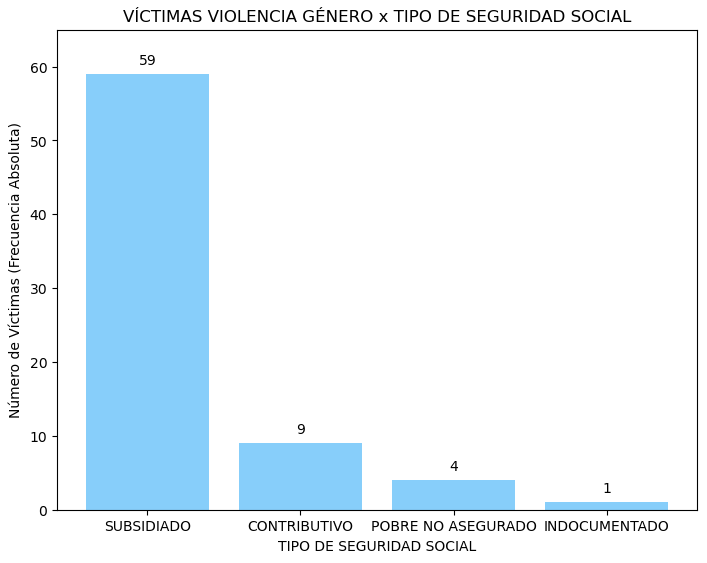

In [12]:
fig_cont_fa = plt.figure()    ## Crea una figura bajo el nombre "fig_cont_fa"
ax = fig_cont_fa.add_axes([0,0,1,1])     ## Crea los ejes de la gráfica donde (0,0) es la esquina inferor izquierda y 
                                          ## (1,1) la esquina superior derecha
ax.bar(tabla_freq['tip_ss_'],tabla_freq['Freq. Abs.'],color='lightskyblue')  ## Crea el gráfico de barras con los datos entregados
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.0f', padding=5)  ## Crea los labels sobre las barras
ax.set(ylim=(0, 65))  ## Cambia los límites del eje Y (limite inferior a limite superior)
plt.title('VÍCTIMAS VIOLENCIA GÉNERO x TIPO DE SEGURIDAD SOCIAL')  ## Título de la gráfica
plt.ylabel('Número de Víctimas (Frecuencia Absoluta)')   ## Título del eje Y 
plt.xlabel('TIPO DE SEGURIDAD SOCIAL')           ## Título del eje X
plt.show()                       ## Muestra la figura

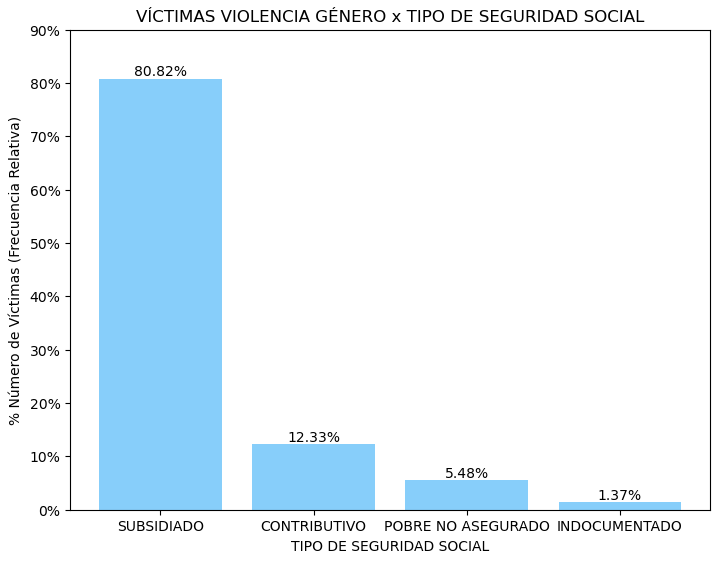

In [13]:
fig_cont_fr = plt.figure()    ## Crea una figura bajo el nombre "fig_cont_fr"
ax = fig_cont_fr.add_axes([0,0,1,1])     ## Crea los ejes de la gráfica donde (0,0) es la esquina inferor izquierda y 
                                          ## (1,1) la esquina superior derecha
ax.bar(tabla_freq['tip_ss_'],tabla_freq['Freq. Rel.']*100,color='lightskyblue')  ## Crea el gráfico de barras con los datos entregados
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.2f%%')  ## Crea los labels sobre las barras
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))  ## Cambia la unidad de medida del eje Y a porcentaje
ax.set(ylim=(0, 90))  ## Cambia los límites del eje Y
plt.title('VÍCTIMAS VIOLENCIA GÉNERO x TIPO DE SEGURIDAD SOCIAL')  ## Título de la gráfica
plt.ylabel('% Número de Víctimas (Frecuencia Relativa)')   ## Título del eje Y 
plt.xlabel('TIPO DE SEGURIDAD SOCIAL')           ## Título del eje X
plt.show()  ## Muestra la figura

In [14]:
base_subs.dtypes

fec_not     datetime64[ns]
cod_pre             object
tip_ide_            object
sexo_               object
edad_                int64
tip_ss_             object
estrato_           float64
nom_eve             object
dtype: object

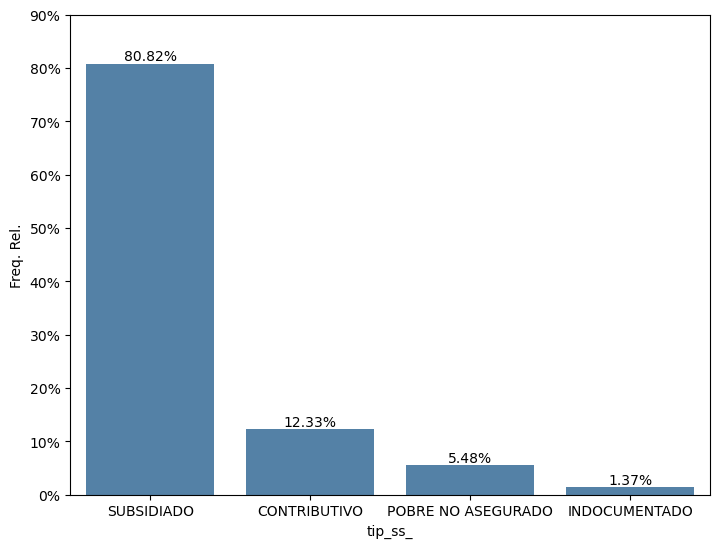

In [15]:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.barplot(x=tabla_freq['tip_ss_'],y=tabla_freq['Freq. Rel.']*100, color="steelblue") ## aquí es el cambio
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.2f%%')  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax.set(ylim=(0, 90))
plt.show()  

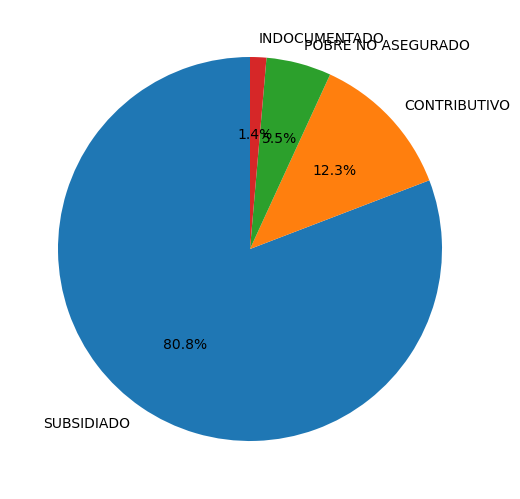

In [16]:
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq['tip_ss_'],autopct='%1.1f%%',startangle=90)
plt.show()

In [17]:
tabla_freq

col_0,tip_ss_,Freq. Abs.,Freq. Rel.
0,SUBSIDIADO,59,0.808219
1,CONTRIBUTIVO,9,0.123288
2,POBRE NO ASEGURADO,4,0.054795
3,INDOCUMENTADO,1,0.013699


In [18]:
base['edad_'].describe

<bound method NDFrame.describe of 0      4
1      1
2      5
3      3
4      8
      ..
68     6
69    10
70    16
71    13
72    17
Name: edad_, Length: 73, dtype: int64>

In [19]:
base_subs.dtypes

fec_not     datetime64[ns]
cod_pre             object
tip_ide_            object
sexo_               object
edad_                int64
tip_ss_             object
estrato_           float64
nom_eve             object
dtype: object

In [20]:
tabla_descriptivas=pd.DataFrame(base[['edad_']].describe())

In [21]:
tabla_descriptivas

,edad_
count,73.000000
mean,8.972603
std,14.846411
min,1.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,93.000000


In [22]:
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [23]:
fun_tabla_descriptivas(base['edad_'])

,edad_
count,73.000000
mean,8.972603
std,14.846411
min,1.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,93.000000
coef. variation,1.654638
skew,4.708950


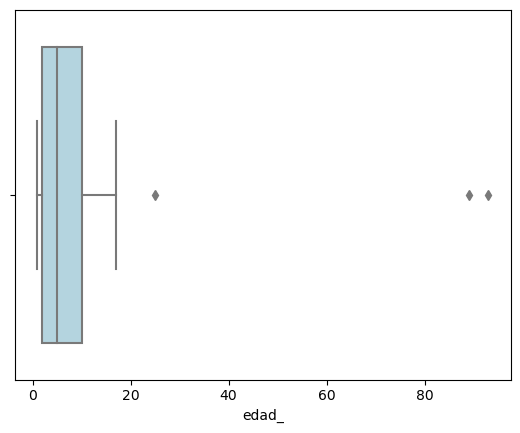

In [24]:
fig_boxplot = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.boxplot(x=base['edad_'],color="lightblue")
plt.show()  

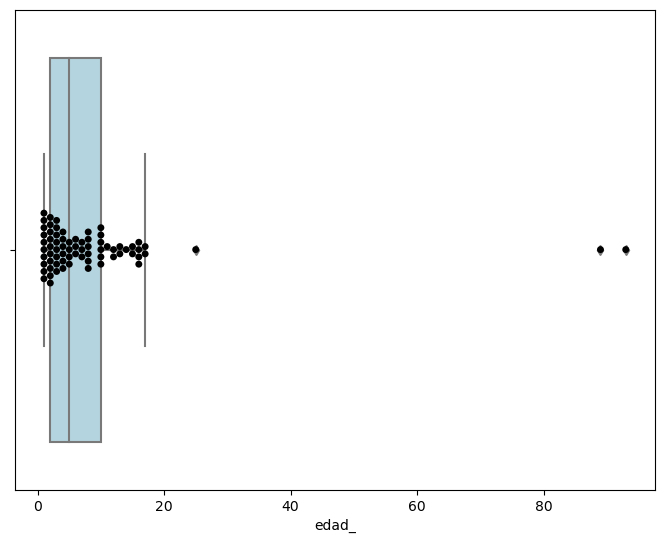

In [25]:
fig_box2 = plt.figure() 
ax = fig_box2.add_axes([0,0,1,1])
ax=sns.boxplot(x=base['edad_'],color="lightblue")
ax = sns.swarmplot(x=base['edad_'],color='black')
plt.show()  

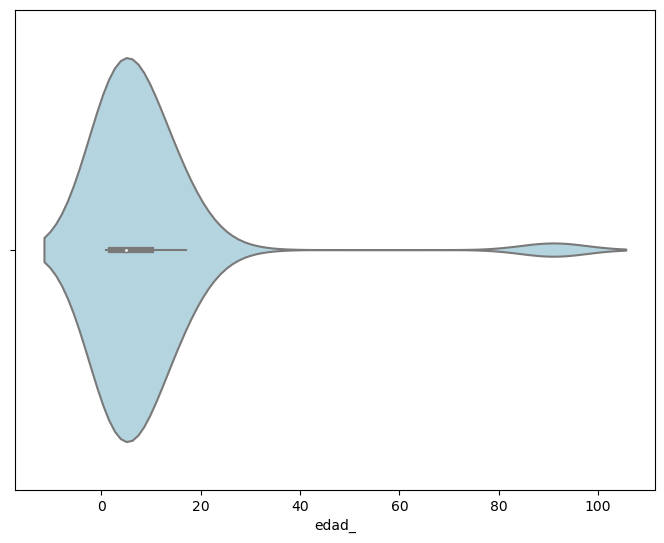

In [26]:
fig_violin = plt.figure() 
ax = fig_violin.add_axes([0,0,1,1])
ax=sns.violinplot(x=base['edad_'],color="lightblue")
plt.show() 

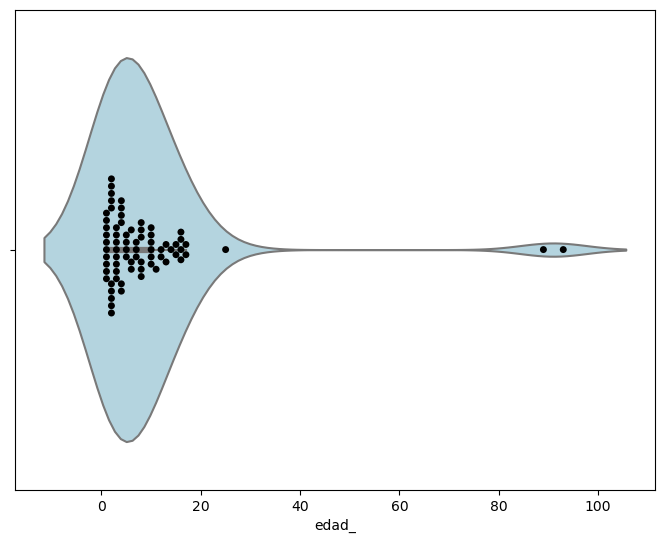

In [27]:
fig_violin = plt.figure() 
ax = fig_violin.add_axes([0,0,1,1])
ax=sns.violinplot(x=base['edad_'],color="lightblue")
ax = sns.swarmplot(x=base['edad_'],color='black')
plt.show() 

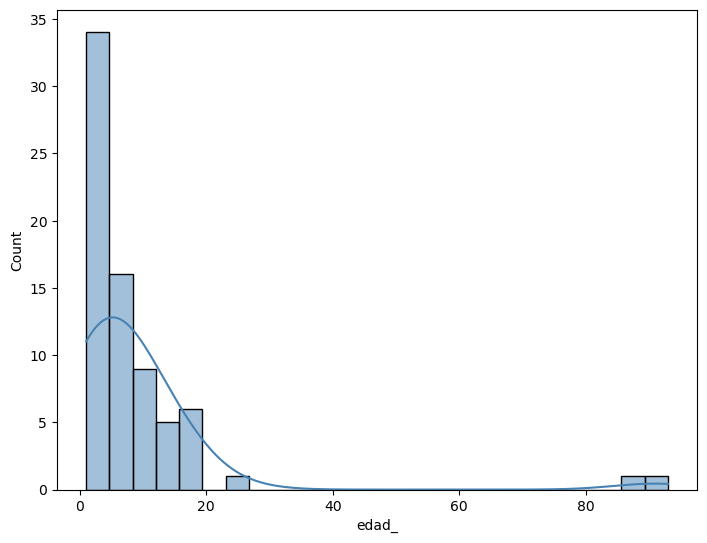

In [28]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base['edad_'],kde=True,color="steelblue")
plt.show() 

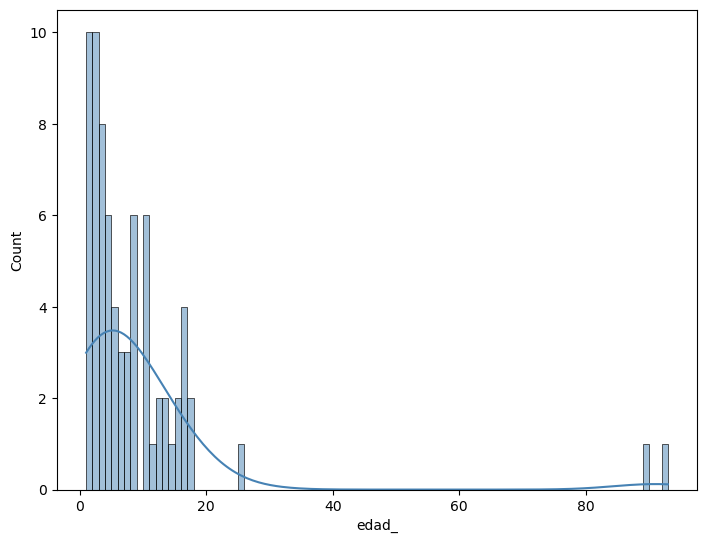

In [29]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base['edad_'],kde=True,color="steelblue", binwidth=1)
plt.show() 

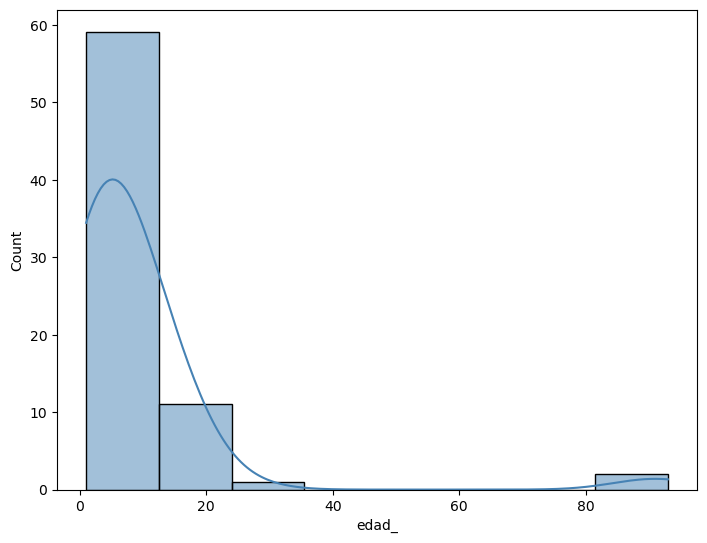

In [30]:
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=base['edad_'],kde=True,color="steelblue", 
                bins=round(2*(len(base['edad_']))**(1/3)))
plt.show()